In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/AI may/cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df['diagnosis']=df['diagnosis'].replace({'B':0,'M':1})
df["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
x = df.iloc[:,2:-1].values
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
y = df.iloc[:,1].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=30,random_state=42)

In [ ]:
import numpy as np
np.unique(y_train,return_counts=True)

(array([0, 1]), array([339, 200]))

In [ ]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([18, 12]))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from tensorflow import keras
from keras import layers

In [ ]:
model=keras.Sequential()
model.add(layers.Dense(15,activation='relu',input_shape=x_train[0].shape))
model.add(layers.Dense(1,activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
model.fit(x_train_scaled,y_train,epochs =50,validation_data=(x_test_scaled,y_test)) 


Epoch 1/50
17/17 [==============================] - 1s 31ms/step - loss: 1.0130 - val_loss: 0.8595
Epoch 2/50
17/17 [==============================] - 0s 3ms/step - loss: 0.6942 - val_loss: 0.6473
Epoch 3/50
17/17 [==============================] - 0s 3ms/step - loss: 0.5727 - val_loss: 0.5051
Epoch 4/50
17/17 [==============================] - 0s 3ms/step - loss: 0.4380 - val_loss: 0.4102
Epoch 5/50
17/17 [==============================] - 0s 4ms/step - loss: 0.3743 - val_loss: 0.3360
Epoch 6/50
17/17 [==============================] - 0s 4ms/step - loss: 0.2835 - val_loss: 0.2832
Epoch 7/50
17/17 [==============================] - 0s 4ms/step - loss: 0.2488 - val_loss: 0.2432
Epoch 8/50
17/17 [==============================] - 0s 4ms/step - loss: 0.2463 - val_loss: 0.2149
Epoch 9/50
17/17 [==============================] - 0s 4ms/step - loss: 0.2288 - val_loss: 0.1945
Epoch 10/50
17/17 [==============================] - 0s 4ms/step - loss: 0.1806 - val_loss: 0.1793
Epoch 11/50
17/17 

In [ ]:
import pandas as pd
loss=pd.DataFrame(model.history.history)
loss

,loss,val_loss
0,0.934982,0.859502
1,0.680827,0.647323
2,0.531871,0.505103
3,0.425798,0.410168
4,0.355119,0.335966
5,0.300743,0.283205
6,0.260370,0.243220
7,0.229167,0.214939
8,0.204544,0.194456
9,0.185598,0.179296


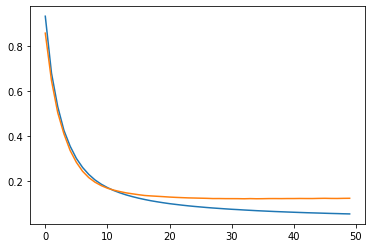

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss)
a=plt.show

In [ ]:
y_pred = np.argmax(model.predict(x_test_scaled),axis=-1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_pred = model.predict_classes(x_test_scaled)
y_pred = y_pred.flatten()
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [ ]:
y_test

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
confusion_matrix(y_pred,y_test)

array([[17,  1],
       [ 1, 11]])

In [ ]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([18, 12]))

In [ ]:
np.unique(y_pred,return_counts=True)

(array([0, 1], dtype=int32), array([18, 12]))

In [ ]:
accuracy_score(y_test,y_pred)

0.9333333333333333

In [ ]:
(18+11)/(18+1+11)

0.9666666666666667

In [ ]:
#early stoping
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(mode='min', verbose =1, patience =5)
model.fit(x_train_scaled,y_train,epochs =400,validation_data=(x_test_scaled,y_test),callbacks=[early_stop])

Epoch 1/400
17/17 [==============================] - 0s 7ms/step - loss: 0.0520 - val_loss: 0.1226
Epoch 2/400
17/17 [==============================] - 0s 3ms/step - loss: 0.0514 - val_loss: 0.1223
Epoch 3/400
17/17 [==============================] - 0s 3ms/step - loss: 0.0507 - val_loss: 0.1232
Epoch 4/400
17/17 [==============================] - 0s 3ms/step - loss: 0.0500 - val_loss: 0.1228
Epoch 5/400
17/17 [==============================] - 0s 4ms/step - loss: 0.0495 - val_loss: 0.1225
Epoch 6/400
17/17 [==============================] - 0s 4ms/step - loss: 0.0489 - val_loss: 0.1232
Epoch 7/400
17/17 [==============================] - 0s 4ms/step - loss: 0.0481 - val_loss: 0.1237
Epoch 00007: early stopping


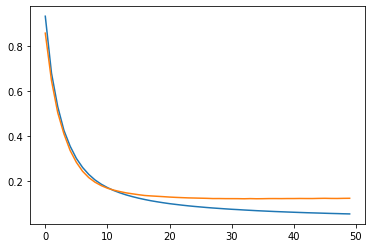

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss)
a=plt.show

In [ ]:
model=keras.Sequential()
model.add(layers.Dense(15,activation='relu',input_shape=x_train[0].shape))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1,activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
model.fit(x_train_scaled,y_train,epochs =50,validation_data=(x_test_scaled,y_test)) 


Epoch 1/50
17/17 [==============================] - 1s 11ms/step - loss: 0.8058 - val_loss: 0.5798
Epoch 2/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6329 - val_loss: 0.4664
Epoch 3/50
17/17 [==============================] - 0s 3ms/step - loss: 0.5621 - val_loss: 0.3891
Epoch 4/50
17/17 [==============================] - 0s 3ms/step - loss: 0.4898 - val_loss: 0.3285
Epoch 5/50
17/17 [==============================] - 0s 3ms/step - loss: 0.4208 - val_loss: 0.2829
Epoch 6/50
17/17 [==============================] - 0s 3ms/step - loss: 0.3358 - val_loss: 0.2454
Epoch 7/50
17/17 [==============================] - 0s 3ms/step - loss: 0.3267 - val_loss: 0.2148
Epoch 8/50
17/17 [==============================] - 0s 3ms/step - loss: 0.2691 - val_loss: 0.1901
Epoch 9/50
17/17 [==============================] - 0s 4ms/step - loss: 0.2524 - val_loss: 0.1694
Epoch 10/50
17/17 [==============================] - 0s 4ms/step - loss: 0.2003 - val_loss: 0.1529
Epoch 11/50
17/17 

In [ ]:
import pandas as pd
loss=pd.DataFrame(model.history.history)
loss

,loss,val_loss
0,0.792646,0.579755
1,0.624391,0.466428
2,0.534902,0.389095
3,0.469296,0.328464
4,0.390302,0.282931
5,0.357837,0.245354
6,0.305064,0.214780
7,0.258014,0.190119
8,0.238699,0.169362
9,0.206446,0.152939


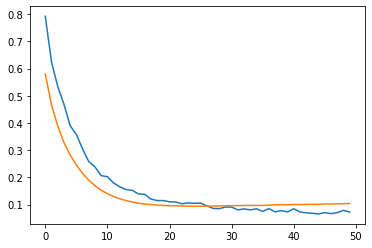

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss)
a=plt.show

In [ ]:
#early stoping
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(mode='min', verbose =1, patience =5)
model.fit(x_train_scaled,y_train,epochs =400,validation_data=(x_test_scaled,y_test),callbacks=[early_stop])

Epoch 1/400
17/17 [==============================] - 0s 7ms/step - loss: 0.0702 - val_loss: 0.1047
Epoch 2/400
17/17 [==============================] - 0s 3ms/step - loss: 0.0678 - val_loss: 0.1056
Epoch 3/400
17/17 [==============================] - 0s 4ms/step - loss: 0.0650 - val_loss: 0.1055
Epoch 4/400
17/17 [==============================] - 0s 4ms/step - loss: 0.0689 - val_loss: 0.1062
Epoch 5/400
17/17 [==============================] - 0s 4ms/step - loss: 0.0662 - val_loss: 0.1069
Epoch 6/400
17/17 [==============================] - 0s 5ms/step - loss: 0.0534 - val_loss: 0.1071
Epoch 00006: early stopping
